In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


paris = pd.read_csv('ParisHousing.csv', index_col='Unnamed: 0')

cat_cols = [
    'numberOfRooms',
    'isNewBuilt',
    'hasStormProtector',
    'hasStorageRoom',
    'category',
    'PoolAndYard',
]

for col in cat_cols:
    paris[col] = paris[col].astype('category').cat.codes

# as you wish
# paris = pd.get_dummies(paris, prefix=cat_cols, columns=cat_cols)



In [2]:
X = paris.values


Text(0.5, 1.0, 'Elbow Method For Optimal k')

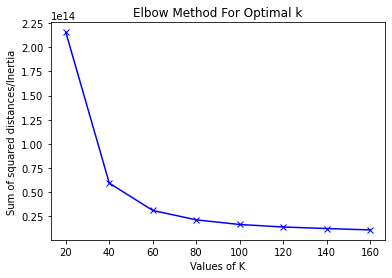

In [3]:
Sum_of_squared_distances = []
K = range(20, 180, 20)
for num_clusters in K:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    Sum_of_squared_distances.append(kmeans.inertia_)
    
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')


Text(0.5, 1.0, 'Silhouette analysis For Optimal k')

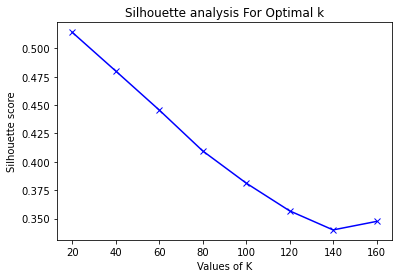

In [4]:
range_n_clusters = [20, 40, 60, 80, 100, 120, 140, 160]
silhouette_avg = []

for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg.append(silhouette_score(X, cluster_labels))
    
plt.plot(range_n_clusters, silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')


In [5]:
# Controller agrred with the answer = 40